<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vector Operations

In [1]:
import numpy as np
import time

In [2]:
# Bubble Sort Algorithm

def bubbleSort(arr): 
    n = len(arr) 

    for i in range(n-1): 
        for j in range(0, n-i-1): 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 
    return arr

In [3]:
# Generate random vector of size 2000

def generate_rv(arr):
    return np.random.uniform(1, 100, size=(arr))


# Select operation

def fun_operation(v, n):
    if n==0:
        return 5
    elif n==1:
        return np.add.reduce(v)
    elif n==2:
        return np.multiply.reduce(v)
    elif n==3:
        return bubbleSort(v)
    elif n==4:
        return np.sort(v, kind='quicksort')
    elif n==5:
        return np.sort(v, kind='mergesort') # timsort
    elif n==6:
        return np.polyval(v, 1.5)
    else:
        return None

In [4]:
time_averages = np.zeros((5, 7))

for run in range(5):
    time_elapsed = np.zeros((7, 2000))

    for n in range(2000):
        v = generate_rv(arr=100)

        for op in range(7):
            start_time = time.time()
            y = fun_operation(v, op)
            time_elapsed[op][n] = (time.time() - start_time)

    time_averages[run] = (np.mean(time_elapsed, axis=1))

In [5]:
from tabulate import tabulate
headers = ['Constant','Sum','Product','Bubble Sort','Quick Sort','Tim Sort','Polyval-Horners']
table = tabulate(time_averages, headers, tablefmt='fancy_grid')
print(table)

╒═════════════╤═════════════╤═════════════╤═══════════════╤══════════════╤═════════════╤═══════════════════╕
│    Constant │         Sum │     Product │   Bubble Sort │   Quick Sort │    Tim Sort │   Polyval-Horners │
╞═════════════╪═════════════╪═════════════╪═══════════════╪══════════════╪═════════════╪═══════════════════╡
│ 5.39422e-07 │ 5.44715e-06 │ 2.47788e-06 │    0.00268873 │  1.00802e-05 │ 4.89581e-06 │       6.07395e-05 │
├─────────────┼─────────────┼─────────────┼───────────────┼──────────────┼─────────────┼───────────────────┤
│ 5.30124e-07 │ 5.30398e-06 │ 2.39241e-06 │    0.0026684  │  9.60231e-06 │ 4.09365e-06 │       5.9754e-05  │
├─────────────┼─────────────┼─────────────┼───────────────┼──────────────┼─────────────┼───────────────────┤
│ 5.24759e-07 │ 5.00619e-06 │ 2.28405e-06 │    0.00265657 │  8.82542e-06 │ 3.91579e-06 │       5.84959e-05 │
├─────────────┼─────────────┼─────────────┼───────────────┼──────────────┼─────────────┼───────────────────┤
│ 5.41925e-07 │ 6.3

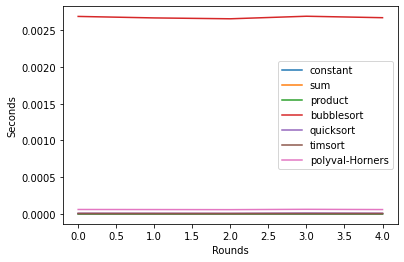

In [6]:
from matplotlib import pyplot as plt
time_avgs = time_averages.transpose()
plt.plot(time_avgs[0], label='constant')
plt.plot(time_avgs[1], label='sum')
plt.plot(time_avgs[2], label='product')
plt.plot(time_avgs[3], label='bubblesort')
plt.plot(time_avgs[4], label='quicksort')
plt.plot(time_avgs[5], label='timsort')
plt.plot(time_avgs[6], label='polyval-Horners')
plt.xlabel('Rounds')
plt.ylabel('Seconds')
plt.legend()
plt.show()

## Matrix Operations

In [7]:
def generate_matrix(arr):
    return np.random.rand(arr, arr)

In [8]:
mat_time_averages = np.zeros(5)

for run in range(5):
    mat_time_elapsed = np.zeros(2000)
    for n in range(2000):
        A = generate_matrix(arr=100)
        B = generate_matrix(arr=100)

        start_time = time.time()
        y = np.matmul(A, B)
        mat_time_elapsed[n] = (time.time() - start_time)
        
    mat_time_averages[run] = np.mean(mat_time_elapsed)

In [9]:
mat_time_averages

array([0.00011698, 0.00012248, 0.0001085 , 0.00010275, 0.00012718])